# Problem Statement
Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


 

In [2]:
import pandas as pd
from sklearn.cluster import KMeans,AgglomerativeClustering
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sn
import numpy as np
import scipy.cluster.hierarchy as sch

In [3]:
aldata1=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')

In [5]:
aldata1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


# EDA

In [315]:
aldata1.shape

(3999, 12)

In [6]:
aldata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [16]:
aldata1.rename(columns={'ID#':'id','Award?':'Award'},inplace=True)
aldata=aldata1.iloc[:,0:]

rsadata=aldata.copy()
findata=rsadata.copy()

In [17]:
rsadata.head()

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


### Normalizing data

In [18]:
#craeted a function 
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)
#calling a function 
rsa_normdata=norm_func(rsadata.iloc[:,1:])
#displaying normalized data
rsa_normdata.head(5)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


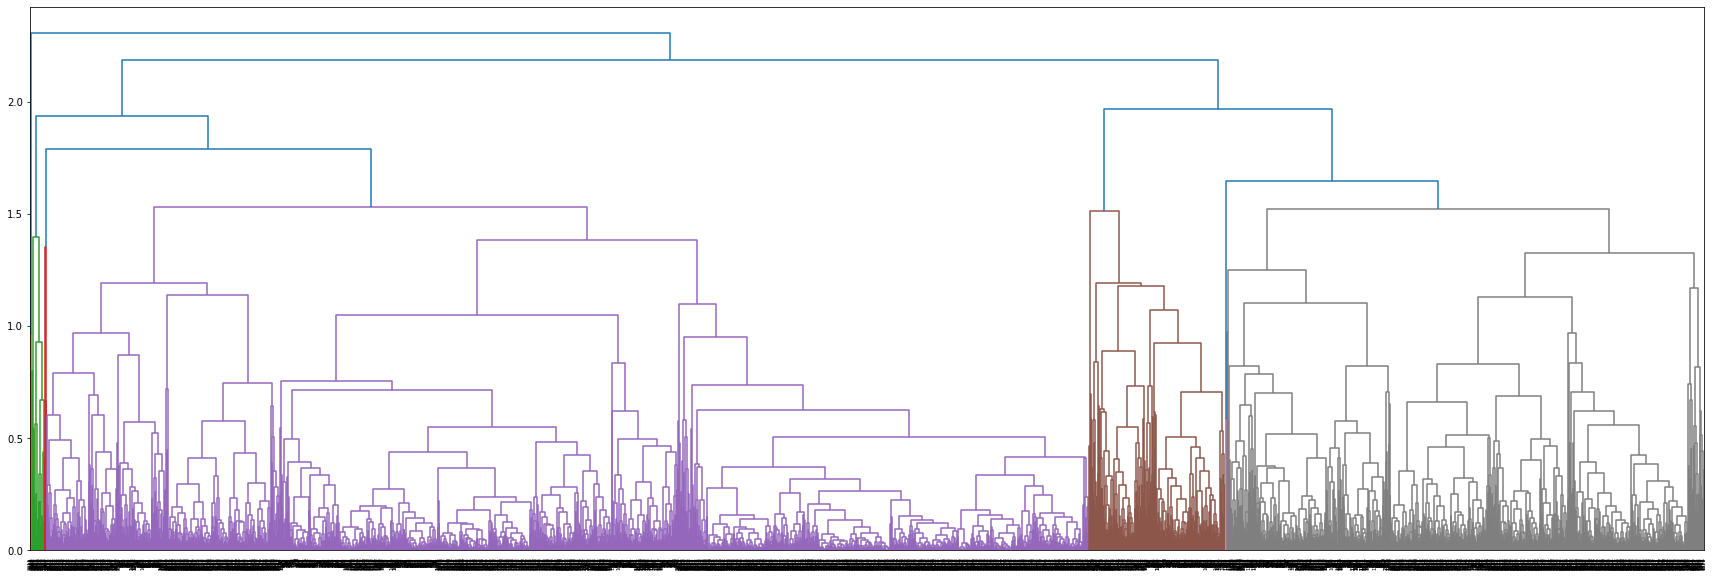

In [19]:
#graphical represenation of possible clusters with dendogram
plt.figure(figsize=(30,10))
dendrogram=sch.dendrogram(sch.linkage(rsa_normdata,method='complete'))

# Creating a Model

In [41]:
Al=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
cluster_id=Al.fit_predict(rsa_normdata)
cluster_id.shape
#craeting a new column for clusterid
rsadata["cluster_id"]=cluster_id

In [42]:
cluster_info=rsadata.groupby(["cluster_id"])['id'].apply(lambda x:tuple(x))
cluster_info

cluster_id
0    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
1                             (2032, 3257, 3606, 3617)
2    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
Name: id, dtype: object

In [43]:
rsadata[rsadata['cluster_id']==0]

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


In [44]:

rsadata[rsadata['cluster_id']==1]
 

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,1
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,1
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,1
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,1


In [45]:
rsadata[rsadata['cluster_id']==2]

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,2
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,2
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


# Finding optimum Number of clusters by using Silhouette score

In [370]:
from sklearn.metrics import silhouette_score as sil

In [381]:
nc=[2,3,4,5,6,7,8,9,10]
sc_score=[]
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(rsadata.iloc[:,1:12])
    sc_score.append(sil(rsadata.iloc[:,1:12],y))

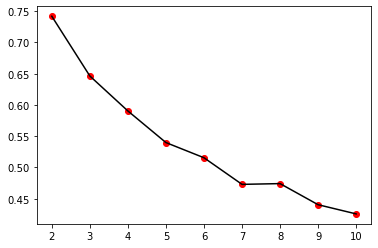

In [382]:
plt.plot(nc,sc_score,color="black")
plt.scatter(nc,sc_score,color="red")
plt.show()

# Finding optimal number of clusters by Elbow score

In [384]:
nc=[2,3,4,5,6,7,8,9,10]
iner=[]
for i in nc:
    km=KMeans(i)
    y=km.fit_predict(rsadata.iloc[:,1:12])
    iner.append(km.inertia_)

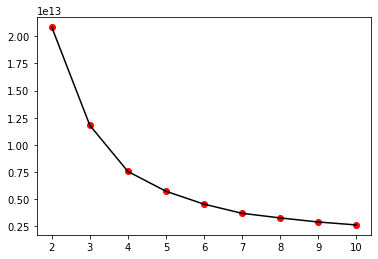

In [385]:
plt.plot(nc,iner,color="black")
plt.scatter(nc,iner,color="red")
plt.show()

# creating 5 clusters

In [48]:
Alf=AgglomerativeClustering(n_clusters=5,affinity='l1',linkage='average')
cluster_idf=Alf.fit_predict(rsa_normdata)
cluster_idf
findata["cluster_id"]=cluster_idf

In [49]:
c=findata.groupby(["cluster_id"])['id'].apply(lambda x:tuple(x))

In [50]:
findata

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [54]:
findata[findata['cluster_id']==0]


,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
275,279,1704838,0,1,1,1,17108,32,4823,23,7283,1,0
2999,3021,142527,1000,1,3,1,24091,47,4650,24,3206,1,0


In [55]:
findata[findata['cluster_id']==1]

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
384,389,28193,0,5,1,4,103456,32,0,0,6980,1,1
850,861,25629,0,4,1,5,107308,36,600,2,5966,1,1
904,915,15835,0,2,1,5,112171,16,0,0,5825,1,1
1036,1047,154664,0,4,1,3,73881,33,0,0,5769,0,1
1244,1257,166465,0,4,1,4,98717,30,0,0,5531,0,1
1300,1313,737514,0,3,1,4,43993,40,2150,7,5030,0,1
1878,1895,128302,0,5,1,4,132263,32,400,2,4103,1,1
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,1
1946,1963,126873,0,4,1,5,95598,32,500,1,3880,1,1
2251,2269,125679,0,3,1,4,68151,27,650,1,3683,0,1


In [139]:
findata[findata['cluster_id']==2]

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [140]:
findata[findata['cluster_id']==3]

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,3
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,3


In [141]:
findata[findata['cluster_id']==4]

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
94,97,185549,0,5,1,1,110859,39,2950,16,6778,1,4
121,124,205126,0,5,1,1,126630,45,2250,10,7668,1,4
126,129,602064,0,5,1,1,194753,26,2250,10,7652,1,4
151,154,930410,0,5,1,1,211284,18,2250,6,7640,1,4
190,194,123516,0,5,1,1,240544,31,500,2,7507,1,4
220,224,1302051,2706,5,1,1,90653,32,3050,7,7467,1,4
238,242,30962,0,5,1,1,97683,37,6400,18,7360,1,4
313,317,714717,0,5,1,1,119162,20,1750,4,7183,1,4
327,331,388455,0,5,1,1,114329,26,6078,8,7164,1,4
380,385,377252,0,5,1,1,230629,30,6393,13,6996,1,4


# KMean Clustering

In [60]:
kdata=aldata2

In [61]:
kdata.head(10)

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [62]:
from sklearn.cluster import KMeans

In [63]:
model_kmeans = KMeans(n_clusters=3) 
model_kmeans.fit(rsa_normdata)

KMeans(n_clusters=3)

In [64]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [65]:
md=pd.Series(model_kmeans.labels_)

In [66]:
kdata['KCluster_id']=md

In [67]:
kdata

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KCluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [68]:
md1=kdata.groupby(['KCluster_id'])['id'].apply(lambda x:tuple(x))

In [69]:
clusterk0=kdata[kdata['id'].isin(md1[0])]
clusterk0

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KCluster_id
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,0
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,0
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0


Cluster 0 -contain -nearly all the passenger with value 1 for   cc1_miles,cc2,and cc3 and flight _trans 12 travel non flight transaction 0

In [71]:
clusterk1=kdata[kdata['id'].isin(md1[1])]
clusterk1

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KCluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [72]:
clusterk2=kdata[kdata['id'].isin(md1[2])]
clusterk2

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,KCluster_id
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,2
32,33,276571,0,4,1,1,42044,23,0,0,7872,0,2
44,45,121260,0,3,1,1,18493,18,0,0,7808,0,2
56,57,75971,0,4,1,1,34339,14,0,0,6869,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,2
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,2
3980,4003,28867,0,3,1,1,19169,28,0,0,1425,0,2
3985,4008,59017,0,4,1,1,34746,25,0,0,1418,0,2


Inference for KMean 
       Here 3 cluster got created,cluster2 has cust id which has cc1_miles between 3&4 also there bonus_trans is in range of 11 to 40
       cluster1 - has customer which has dayas since enroll from 1000 to 6000
     

# DBSCAN

In [74]:
from sklearn.cluster import DBSCAN
dbdata=aldata2.iloc[:,:12]
dbdata.head(3)

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0


In [134]:
dbs=DBSCAN(min_samples=22,eps=0.25)
cluster_pr=dbs.fit_predict(rsa_normdata)


In [135]:
cluster_pr

array([0, 0, 0, ..., 4, 0, 0])

In [136]:
dbdata['cluster_id']=cluster_pr

In [137]:
dbdata

,id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [138]:
dbdata.cluster_id.value_counts()

 0    1680
 3     515
 2     325
 1     286
 4     273
 7     208
 6     186
-1     184
 5     176
 8     100
 9      66
Name: cluster_id, dtype: int64

In [ ]:
With DBSCAN we craeted 10 from that data points in 